In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow import feature_column

from os import getcwd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

import dataset 

In [3]:
df = pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Check struktur data

In [5]:
df.info(verbose = True, null_counts =True)

/tmp/ipykernel_20/2692742495.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose = True, null_counts =True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.shape

(6362620, 11)

get statistical summary

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


analize categorical variables

In [8]:
df.select_dtypes(include='object').columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [9]:
len(df.select_dtypes(include='object').columns)

3

analize numerical variables

In [10]:
df.select_dtypes(include=["int64","float64"]).columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [11]:
len(df.select_dtypes(include=["int64","float64"]).columns)

8

dealing with missing value

In [12]:
df.isnull().values.any()

False

delete 'nameOrig'dan 'nameDest' for dimension reduction

In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
df.drop(columns=["nameOrig", "nameDest"], inplace=True)

In [15]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


do one hot for type

In [16]:
df2 = pd.get_dummies(df, columns=["type"], prefix=["type"])

chek correlation

In [17]:
df2.corr(numeric_only=False)["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
type_TRANSFER     0.053869
isFlaggedFraud    0.044109
step              0.031578
type_CASH_OUT     0.011256
oldbalanceOrg     0.010154
newbalanceDest    0.000535
type_DEBIT       -0.002911
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
type_CASH_IN     -0.019089
type_PAYMENT     -0.025697
Name: isFraud, dtype: float64

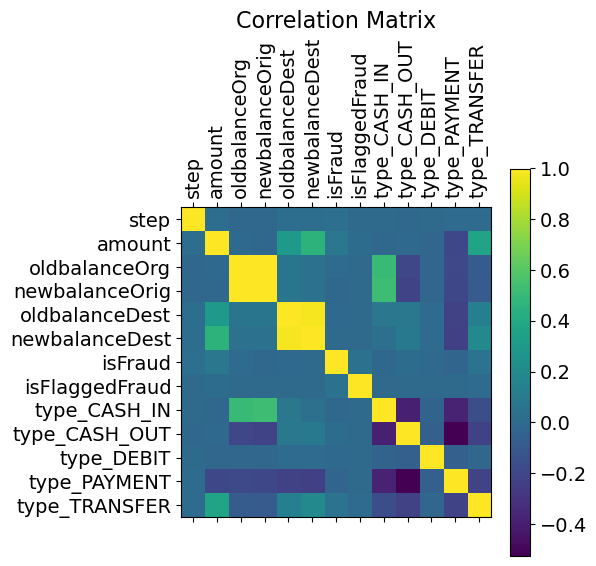

In [18]:
f=plt.figure(figsize=(5,5))
plt.matshow(df2.corr(numeric_only=False),fignum=f.number)
plt.xticks(range(df2.select_dtypes(['number','object']).shape[1]),df2.select_dtypes(['number','object']).columns,fontsize=14,rotation=90)
plt.yticks(range(df2.select_dtypes(['number','object']).shape[1]),df2.select_dtypes(['number','object']).columns,fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix',fontsize=16);

normalisasi

In [19]:
scaler = MinMaxScaler()
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
df2[numeric_columns] = scaler.fit_transform(df2[numeric_columns])

split the df into train, val, test

In [20]:
train, test = train_test_split(df2, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

In [21]:
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

4072076 train examples
1018020 validation examples
1272524 test examples


creating an input pipeline using tf.data

In [22]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    
    # Mengambil kolom "isFraud" sebagai label
    labels = dataframe.pop('isFraud')
    
    # Membuat tf.data.Dataset dari dataframe dan labels
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels.values))
    
    if shuffle:
        # Mengacak dataset
        ds = ds.shuffle(len(dataframe))
        
    # Membagi dataset menjadi batch
    ds = ds.batch(batch_size)
    
    return ds


create feature layer

In [23]:
df2.dtypes

step              float64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud    float64
type_CASH_IN      float64
type_CASH_OUT     float64
type_DEBIT        float64
type_PAYMENT      float64
type_TRANSFER     float64
dtype: object

In [24]:
# Mengambil daftar nama kolom fitur (semua kolom kecuali "isFraud")
feature_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                   'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

# Membuat feature columns dari daftar nama kolom
feature_columns = [tf.feature_column.numeric_column(col) for col in feature_columns]

# Definisikan feature layer menggunakan feature columns
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [25]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

create, compile and train the model

In [26]:
model = tf.keras.Sequential([
        feature_layer,
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)

Epoch 1/10
127253/127253 [==============================] - 560s 4ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 2/10
127253/127253 [==============================] - 503s 4ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 3/10
127253/127253 [==============================] - 599s 4ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 4/10
127253/127253 [==============================] - 543s 4ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 5/10
127253/127253 [==============================] - 572s 4ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 6/10
127253/127253 [==============================] - 564s 4ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 7/10
127253/127253 [==============================] - 546s 4ms/step - loss: 0.0032 - accuracy: